In [ ]:
# Import library utama
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Library machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
# Baca data dari file Excel
df = pd.read_excel("/content/Sales_Data_Analysis.xlsx")

# Lihat 5 baris pertama
df.head()


,Order ID,Date,Product,Price,Quantity,Purchase Type,Payment Method,Manager,City
0,10452,2022-11-07,Fries,3.49,573.065903,Online,Gift Card,Tom Jackson,London
1,10453,2022-11-07,Beverages,2.95,745.762712,Online,Gift Card,Pablo Perez,Madrid
2,10454,2022-11-07,Sides & Other,4.99,200.400802,In-store,Gift Card,Joao Silva,Lisbon
3,10455,2022-11-08,Burgers,12.99,569.668976,In-store,Credit Card,Walter Muller,Berlin
4,10456,2022-11-08,Chicken Sandwiches,9.95,201.005025,In-store,Credit Card,Walter Muller,Berlin


In [ ]:
# Cek tipe data dan nilai kosong
print(df.info())
print("\nMissing Values:\n", df.isnull().sum())

# Ubah kolom 'Date' ke datetime
df['Date'] = pd.to_datetime(df['Date'])

# Buat kolom total penjualan
df['Total_Sales'] = df['Price'] * df['Quantity']

# Encode kolom kategori menjadi numerik (One-Hot Encoding)
df_encoded = pd.get_dummies(df, columns=['Purchase Type', 'Payment Method', 'Manager', 'City'], drop_first=True)

# Pilih fitur (X) dan target (y)
X = df_encoded.drop(columns=['Order ID', 'Date', 'Total_Sales'])
y = df_encoded['Total_Sales']


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254 entries, 0 to 253
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Order ID        254 non-null    int64         
 1   Date            254 non-null    datetime64[ns]
 2   Product         254 non-null    object        
 3   Price           254 non-null    float64       
 4   Quantity        254 non-null    float64       
 5   Purchase Type   254 non-null    object        
 6   Payment Method  254 non-null    object        
 7   Manager         254 non-null    object        
 8   City            254 non-null    object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 18.0+ KB
None

Missing Values:
 Order ID          0
Date              0
Product           0
Price             0
Quantity          0
Purchase Type     0
Payment Method    0
Manager           0
City              0
dtype: int64


In [ ]:
cate_features = [col for col in df.columns if df[col].dtype=='object']
num_features=[col for col in df.columns if df[col].dtype!='object']

In [ ]:
df[cate_features]

,Product,Purchase Type,Payment Method,Manager,City
0,Fries,Online,Gift Card,Tom Jackson,London
1,Beverages,Online,Gift Card,Pablo Perez,Madrid
2,Sides & Other,In-store,Gift Card,Joao Silva,Lisbon
3,Burgers,In-store,Credit Card,Walter Muller,Berlin
4,Chicken Sandwiches,In-store,Credit Card,Walter Muller,Berlin
...,...,...,...,...,...
249,Sides & Other,Drive-thru,Gift Card,Walter Muller,Berlin
250,Burgers,Drive-thru,Gift Card,Walter Muller,Berlin
251,Chicken Sandwiches,Drive-thru,Gift Card,Walter Muller,Berlin
252,Fries,Drive-thru,Gift Card,Walter Muller,Berlin


In [ ]:
df_encoded = pd.get_dummies(df[cate_features], drop_first=True)
df_encoded.head()

,Product_Burgers,Product_Chicken Sandwiches,Product_Fries,Product_Sides & Other,Purchase Type_In-store,Purchase Type_Online,Payment Method_ Credit Card,Payment Method_ Gift Card,Manager_Pablo Perez,Manager_Remy Monet,Manager_Tom Jackson,Manager_Walter Muller,City_Lisbon,City_London,City_Madrid,City_Paris
0,False,False,True,False,False,True,False,True,False,False,True,False,False,True,False,False
1,False,False,False,False,False,True,False,True,True,False,False,False,False,False,True,False
2,False,False,False,True,True,False,False,True,False,False,False,False,True,False,False,False
3,True,False,False,False,True,False,True,False,False,False,False,True,False,False,False,False
4,False,True,False,False,True,False,True,False,False,False,False,True,False,False,False,False


In [ ]:
df['Sales'] = df['Price'] * df['Quantity']
df

,Order ID,Date,Product,Price,Quantity,Purchase Type,Payment Method,Manager,City,Total_Sales,Sales
0,10452,2022-11-07,Fries,3.49,573.065903,Online,Gift Card,Tom Jackson,London,2000.0,2000.0
1,10453,2022-11-07,Beverages,2.95,745.762712,Online,Gift Card,Pablo Perez,Madrid,2200.0,2200.0
2,10454,2022-11-07,Sides & Other,4.99,200.400802,In-store,Gift Card,Joao Silva,Lisbon,1000.0,1000.0
3,10455,2022-11-08,Burgers,12.99,569.668976,In-store,Credit Card,Walter Muller,Berlin,7400.0,7400.0
4,10456,2022-11-08,Chicken Sandwiches,9.95,201.005025,In-store,Credit Card,Walter Muller,Berlin,2000.0,2000.0
...,...,...,...,...,...,...,...,...,...,...,...
249,10709,2022-12-28,Sides & Other,4.99,200.400802,Drive-thru,Gift Card,Walter Muller,Berlin,1000.0,1000.0
250,10710,2022-12-29,Burgers,12.99,754.426482,Drive-thru,Gift Card,Walter Muller,Berlin,9800.0,9800.0
251,10711,2022-12-29,Chicken Sandwiches,9.95,281.407035,Drive-thru,Gift Card,Walter Muller,Berlin,2800.0,2800.0
252,10712,2022-12-29,Fries,3.49,630.372493,Drive-thru,Gift Card,Walter Muller,Berlin,2200.0,2200.0


In [ ]:
data_cat=df[cate_features]
data_cat['harga'] = df['Price']

/tmp/ipython-input-2881151458.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cat['harga'] = df['Price']


In [ ]:
data_cat

,Product,Purchase Type,Payment Method,Manager,City,harga
0,2464.205854,2852.336449,2906.896552,2816.000000,London,3.49
1,2064.000000,2852.336449,2906.896552,2960.869565,Madrid,2.95
2,1000.000000,3322.252262,2906.896552,3222.849261,Lisbon,4.99
3,7250.000000,3322.252262,3014.280788,3353.333333,Berlin,12.99
4,2204.599923,3322.252262,3014.280788,3353.333333,Berlin,9.95
...,...,...,...,...,...,...
249,1000.000000,2927.868852,2906.896552,3353.333333,Berlin,4.99
250,7250.000000,2927.868852,2906.896552,3353.333333,Berlin,12.99
251,2204.599923,2927.868852,2906.896552,3353.333333,Berlin,9.95
252,2464.205854,2927.868852,2906.896552,3353.333333,Berlin,3.49


In [ ]:
cols=data_cat.columns
cols=cols[0:-1]

In [ ]:
for col in cols:
    dict2 = df.groupby([col])['Sales'].mean().to_dict()
    df[col] = df[col].map(dict2)
df

,Order ID,Date,Product,Price,Quantity,Purchase Type,Payment Method,Manager,City,Total_Sales,Sales
0,10452,2022-11-07,2464.205854,3.49,573.065903,2852.336449,2906.896552,2816.000000,2816.000000,2000.0,2000.0
1,10453,2022-11-07,2064.000000,2.95,745.762712,2852.336449,2906.896552,2960.869565,2960.869565,2200.0,2200.0
2,10454,2022-11-07,1000.000000,4.99,200.400802,3322.252262,2906.896552,3222.849261,3222.849261,1000.0,1000.0
3,10455,2022-11-08,7250.000000,12.99,569.668976,3322.252262,3014.280788,3353.333333,3353.333333,7400.0,7400.0
4,10456,2022-11-08,2204.599923,9.95,201.005025,3322.252262,3014.280788,3353.333333,3353.333333,2000.0,2000.0
...,...,...,...,...,...,...,...,...,...,...,...
249,10709,2022-12-28,1000.000000,4.99,200.400802,2927.868852,2906.896552,3353.333333,3353.333333,1000.0,1000.0
250,10710,2022-12-29,7250.000000,12.99,754.426482,2927.868852,2906.896552,3353.333333,3353.333333,9800.0,9800.0
251,10711,2022-12-29,2204.599923,9.95,281.407035,2927.868852,2906.896552,3353.333333,3353.333333,2800.0,2800.0
252,10712,2022-12-29,2464.205854,3.49,630.372493,2927.868852,2906.896552,3353.333333,3353.333333,2200.0,2200.0


In [ ]:
dataframe=pd.concat([data_cat,df[num_features]],axis=1)
dataframe

,Product,Purchase Type,Payment Method,Manager,City,harga,Order ID,Date,Price,Quantity,Total_Sales
0,2464.205854,2852.336449,2906.896552,2816.000000,London,3.49,10452,2022-11-07,3.49,573.065903,2000.0
1,2064.000000,2852.336449,2906.896552,2960.869565,Madrid,2.95,10453,2022-11-07,2.95,745.762712,2200.0
2,1000.000000,3322.252262,2906.896552,3222.849261,Lisbon,4.99,10454,2022-11-07,4.99,200.400802,1000.0
3,7250.000000,3322.252262,3014.280788,3353.333333,Berlin,12.99,10455,2022-11-08,12.99,569.668976,7400.0
4,2204.599923,3322.252262,3014.280788,3353.333333,Berlin,9.95,10456,2022-11-08,9.95,201.005025,2000.0
...,...,...,...,...,...,...,...,...,...,...,...
249,1000.000000,2927.868852,2906.896552,3353.333333,Berlin,4.99,10709,2022-12-28,4.99,200.400802,1000.0
250,7250.000000,2927.868852,2906.896552,3353.333333,Berlin,12.99,10710,2022-12-29,12.99,754.426482,9800.0
251,2204.599923,2927.868852,2906.896552,3353.333333,Berlin,9.95,10711,2022-12-29,9.95,281.407035,2800.0
252,2464.205854,2927.868852,2906.896552,3353.333333,Berlin,3.49,10712,2022-12-29,3.49,630.372493,2200.0


In [ ]:
x=df.drop(['Total_Sales', 'Sales', 'Date', 'Price'],axis=1)

In [ ]:
y=dataframe['Price']

In [ ]:
x

,Order ID,Product,Quantity,Purchase Type,Payment Method,Manager,City
0,10452,2464.205854,573.065903,2852.336449,2906.896552,2816.000000,2816.000000
1,10453,2064.000000,745.762712,2852.336449,2906.896552,2960.869565,2960.869565
2,10454,1000.000000,200.400802,3322.252262,2906.896552,3222.849261,3222.849261
3,10455,7250.000000,569.668976,3322.252262,3014.280788,3353.333333,3353.333333
4,10456,2204.599923,201.005025,3322.252262,3014.280788,3353.333333,3353.333333
...,...,...,...,...,...,...,...
249,10709,1000.000000,200.400802,2927.868852,2906.896552,3353.333333,3353.333333
250,10710,7250.000000,754.426482,2927.868852,2906.896552,3353.333333,3353.333333
251,10711,2204.599923,281.407035,2927.868852,2906.896552,3353.333333,3353.333333
252,10712,2464.205854,630.372493,2927.868852,2906.896552,3353.333333,3353.333333


In [ ]:
y

,Price
0,3.49
1,2.95
2,4.99
3,12.99
4,9.95
...,...
249,4.99
250,12.99
251,9.95
252,3.49


In [ ]:
x.columns

Index(['Order ID', 'Product', 'Quantity', 'Purchase Type', 'Payment Method',
       'Manager', 'City'],
      dtype='object')

In [ ]:
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

# Latih model seleksi HANYA pada data latih
feature_sel_model = SelectFromModel(Lasso(alpha=0.005))
feature_sel_model.fit(x, y)

# Dapatkan fitur yang terpilih
cols=x.columns
selected_feat = cols[feature_sel_model.get_support()]
selected_feat

Index(['Order ID', 'Product', 'Quantity', 'Purchase Type', 'Payment Method',
       'Manager'],
      dtype='object')

In [ ]:
X_selected = x[selected_feat]

# Bagi data menjadi data latih dan data uji (80% - 20%)
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)


In [ ]:
# Inisialisasi model Linear Regression
linear_model = LinearRegression()

# Latih model
linear_model.fit(X_train, y_train)

# Prediksi
y_pred = linear_model.predict(X_test)


In [ ]:
# Hitung metrik evaluasi
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("=== Evaluasi Model Regresi Linear (Setelah Feature Selection) ===")
print("R² Score :", r2)
print("RMSE :", rmse)


=== Evaluasi Model Regresi Linear (Setelah Feature Selection) ===
R² Score : 0.9071069030222106
RMSE : 1.2268636088577165


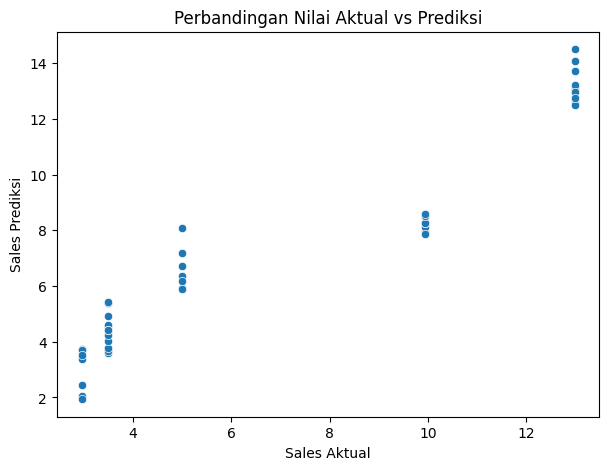

In [ ]:
# 11. Visualisasi perbandingan hasil prediksi dan nilai asli
plt.figure(figsize=(7,5))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Sales Aktual")
plt.ylabel("Sales Prediksi")
plt.title("Perbandingan Nilai Aktual vs Prediksi")
plt.show()